In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#**Learning about the data**

In [102]:
df = pd.read_csv("/content/laptop.csv",na_values=['?', '', 'nan'])

# **Exploration of Data**

In [103]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [104]:
# Removing Unnecssary columns = Unnamed: 0.1,Unnamed: 0
df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"],inplace = True)

In [105]:
df.duplicated().sum()

58

In [106]:
df.drop_duplicates(inplace = True)

In [107]:
df.shape

(1245, 11)

In [108]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1243 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1243 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1243 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(2), object(9)
memory usage: 116.7+ KB


In [110]:
df.select_dtypes(include = "object").head(3)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg


In [111]:
df["Ram"].value_counts()

Ram
8GB     595
4GB     358
16GB    192
6GB      34
12GB     25
32GB     17
2GB      16
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

In [112]:
df["Inches"].value_counts()

Inches
15.6    621
14.0    188
17.3    162
13.3    157
12.5     38
11.6     29
12.0      6
13.9      6
13.5      5
12.3      5
15.4      4
15.0      4
35.6      3
10.1      3
24.0      2
13.0      2
18.4      1
27.3      1
33.5      1
31.6      1
17.0      1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

In [113]:
# Checking the null values
df.isna().sum()

Company             1
TypeName            1
Inches              2
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              2
Gpu                 1
OpSys               1
Weight              2
Price               1
dtype: int64

# **Explorartory Data Analysis**

In [114]:
# Removing the Null values
df.dropna(inplace = True)

In [115]:
# Changing the type of the data # numerical- Inches, Ram, Weight

df["Inches"] =df["Inches"].astype(float)
df["Ram"] = df["Ram"].str.replace('GB','').astype(int)
df["Weight"] = df["Weight"].str.replace('kg','').astype(float)

In [116]:
# Checking the null values
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [117]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [118]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

 **Extracting significant features out of the columns -- ScreenResolution, Cpu, Memory, Gpu,OpSys**

**Extracting Fetures from ScreenResolution**     

In [119]:
df["ScreenResolution"].value_counts()  # Touchscreen, #IPS, # Screen resolution


ScreenResolution
Full HD 1920x1080                                490
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2880

In [120]:
#### Display_type, touchscreen, width and height
# width column
# height column
# Display IPS column -  yes,no
# Touchscreen column-  yes, no
import re

# Extracting width and heigth
def extract_resolution(resolution):
  match = re.search(r'(\d+)x(\d+)',resolution)

  if match:
    return int(match.group(1)),int(match.group(2))
  return None,None

# Extracting display_types from resolution

def display_type(resolution):
  if "IPS" in resolution:
    return 1
  else:
    return 0

# Extracting the Touch type

def touchscreen_type(resolution):
  if "Touchscreen" in resolution:
    return 1
  else:
    return 0

# Apply the def functions
df["Width"],df["Height"] = zip(*df["ScreenResolution"].apply(extract_resolution))
df["Touchscreen"] = df["ScreenResolution"].apply(touchscreen_type)
df["IPS_Panel"] = df["ScreenResolution"].apply(display_type)


In [121]:
# Calculating Pixel per inch from the Horizontel resolution and vertical resolution
ppi_cal = (df["Width"]**2 + df["Height"]**2)
df["Ppi"]= np.sqrt(ppi_cal)/df["Inches"]
df["Ppi"] = round(df["Ppi"],2)

In [122]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Width,Height,Touchscreen,IPS_Panel,Ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,0,1,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0,0,127.68
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,0,0,141.21


In [123]:
df.drop(columns = ["Width", "Height", "ScreenResolution"],inplace = True)

In [124]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98


In [125]:
print(df["IPS_Panel"].value_counts())
df["Touchscreen"].value_counts()

IPS_Panel
0    890
1    351
Name: count, dtype: int64


Touchscreen
0    1060
1     181
Name: count, dtype: int64

**Extracting Features from the Cpu**

In [126]:
df["Cpu"].value_counts().head(50)

Cpu
Intel Core i5 7200U 2.5GHz              183
Intel Core i7 7700HQ 2.8GHz             141
Intel Core i7 7500U 2.7GHz              125
Intel Core i7 8550U 1.8GHz               71
Intel Core i5 8250U 1.6GHz               68
Intel Core i5 6200U 2.3GHz               66
Intel Core i3 6006U 2GHz                 62
Intel Core i7 6500U 2.5GHz               41
Intel Core i7 6700HQ 2.6GHz              41
Intel Core i3 7100U 2.4GHz               35
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     23
Intel Core i7 6600U 2.6GHz               17
Intel Core i3 6006U 2.0GHz               16
Intel Core i5 7300U 2.6GHz               14
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i7 7600U 2.8GHz               13
Intel Core i5 6300U 2.4GHz               11
Intel Pentium Quad Core N3710 1.6GHz     11
AMD A9-Series 9420 3GHz                  11
Intel Core i7 6820HK 2.7GHz              10
Intel Core i3 6100U 2.3GHz  

In [127]:
#### Extracting Cpu Featues
# Cpu_Company_type = Intel, AMD
# Core_type =  i3,i5,i7, Intel Other, AMD
# Cpu_GHz = 1.5GHz = r'\b\d+\.\d+GHz\b'

In [128]:
# Creating and apply of each function to extract features

# To Extract cpu company
def extract_cpu_company(cpu):
  if "Intel" in cpu:
    return "Intel"
  else:
    return "AMD"

# To Extract cpu core

def extract_cpu_core(cpu):
  if "i3" in cpu:
    return "i3"
  elif "i5" in cpu:
    return "i5"
  elif "i7" in cpu:
    return "i7"
  elif "Intel" in cpu:
    return "Intel Others Processor"
  else:
    return "AMD Processor"


# Extracting Cpu_GHz

def extracting_cpu_GHz(cpu):
  pattern = r'\b\d+(\.\d+)?GHz\b'
  match = re.search(pattern,cpu)

  if match:
    return match.group()
  else:
    return "Other"


df["Cpu_Company"] = df["Cpu"].apply(extract_cpu_company)
df["Cpu_Core"] = df["Cpu"].apply(extract_cpu_core)
df["Cpu_GHz"] = df["Cpu"].apply(extracting_cpu_GHz)


In [129]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Ppi,Cpu_Company,Cpu_Core,Cpu_GHz
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel,i5,2.3GHz
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel,i5,1.8GHz
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel,i5,2.5GHz
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel,i7,2.7GHz
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel,i5,3.1GHz


In [130]:
df["Cpu_GHz"].value_counts()     # replace GHz with ''
df["Cpu_Core"].value_counts()
df["Cpu_Company"].value_counts()

Cpu_Company
Intel    1180
AMD        61
Name: count, dtype: int64

In [131]:
# Remove the GHz from the string and make it a float type of Cpu_GHz
df["Cpu_GHz"] = df["Cpu_GHz"].str.replace("GHz",'').astype(float)

In [132]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Ppi,Cpu_Company,Cpu_Core,Cpu_GHz
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel,i5,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel,i5,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel,i5,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel,i7,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel,i5,3.1


**Extracting Features from the Memory**

In [133]:
df["Memory"].sample(5)

604                  1TB HDD
1222                 1TB HDD
1032    128GB SSD +  1TB HDD
868                256GB SSD
528                500GB HDD
Name: Memory, dtype: object

In [134]:
df["Memory"].value_counts()

Memory
256GB SSD                        399
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [135]:
def extract_primary_memory(memory):
  text = memory.split("+")[0].strip()
  return text

df["Primary_memory"] = df["Memory"].apply(extract_primary_memory)

In [136]:
def extract_secondary_memory(memory):
  if "+" in memory:
    text = memory.split("+")[1].strip()
    return text
  else:
    return "0"
df["Secondary_memory"] = df["Memory"].apply(extract_secondary_memory)

In [137]:
def drive_type_ssd(primary_memory):
  if "SSD" in primary_memory:
    memory = re.findall(r'\d+',primary_memory)
    return memory[0]
  else:
    return 0

def drive_type_hdd(primary_memory):
  if "HDD" in primary_memory:
    memory = re.findall(r'\d+',primary_memory)
    return memory[0]
  else:
    return 0

def drive_type_fs(primary_memory):
  if "Flash Storage" in primary_memory:
    memory = re.findall(r'\d+',primary_memory)
    return memory[0]
  else:
    return 0

def drive_type_h(primary_memory):
  if "Hybrid" in primary_memory:
    memory = re.findall(r'\d+',primary_memory)
    return memory[0]
  else:
    return 0

df["SSD_1"] = df["Primary_memory"].apply(drive_type_ssd)
df["HDD_1"] = df["Primary_memory"].apply(drive_type_hdd)
df["Flash_Storage_1"] = df["Primary_memory"].apply(drive_type_fs)
df["Hybrid_1"] = df["Primary_memory"].apply(drive_type_h)

In [138]:
def drive_type_ssd(secondary_memory):
  if "SSD" in secondary_memory:
    memory = re.findall(r'\d+',secondary_memory)
    return memory[0]
  else:
    return 0

def drive_type_hdd(secondary_memory):
  if "HDD" in secondary_memory:
    memory = re.findall(r'\d+',secondary_memory)
    return memory[0]
  else:
    return 0

def drive_type_fs(secondary_memory):
  if "Flash Storage" in secondary_memory:
    memory = re.findall(r'\d+',secondary_memory)
    return memory[0]
  else:
    return 0

def drive_type_h(secondary_memory):
  if "Hybrid" in secondary_memory:
    memory = re.findall(r'\d+',secondary_memory)
    return memory[0]
  else:
    return 0

df["SSD_2"] = df["Secondary_memory"].apply(drive_type_ssd)
df["HDD_2"] = df["Secondary_memory"].apply(drive_type_hdd)
df["Flash_Storage_2"] = df["Secondary_memory"].apply(drive_type_fs)
df["Hybrid_2"] = df["Secondary_memory"].apply(drive_type_h)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 0 to 1273
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1241 non-null   object 
 1   TypeName          1241 non-null   object 
 2   Inches            1241 non-null   float64
 3   Cpu               1241 non-null   object 
 4   Ram               1241 non-null   int64  
 5   Memory            1241 non-null   object 
 6   Gpu               1241 non-null   object 
 7   OpSys             1241 non-null   object 
 8   Weight            1241 non-null   float64
 9   Price             1241 non-null   float64
 10  Touchscreen       1241 non-null   int64  
 11  IPS_Panel         1241 non-null   int64  
 12  Ppi               1241 non-null   float64
 13  Cpu_Company       1241 non-null   object 
 14  Cpu_Core          1241 non-null   object 
 15  Cpu_GHz           1241 non-null   float64
 16  Primary_memory    1241 non-null   object 
 17  

In [140]:
df["Hybrid_1"] = df["Hybrid_1"].astype(int)
df["Hybrid_2"] = df["Hybrid_2"].astype(int)
df["HDD_2"] = df["HDD_2"].astype(int)
df["SSD_2"] = df["SSD_2"].astype(int)
df["Flash_Storage_1"] = df["Flash_Storage_1"].astype(int)
df["HDD_1"] = df["HDD_1"].astype(int)
df["SSD_1"] = df["SSD_1"].astype(int)
df["Flash_Storage_2"] = df["Flash_Storage_2"].astype(int)

In [141]:
# Changing the 1 or 2 TB Value with the 1000 GB
column = ["SSD_1", "HDD_1", "Flash_Storage_1", "Hybrid_1", "SSD_2", "HDD_2", "Flash_Storage_2", "Hybrid_2"]

for col in column:
  df[col] = df[col].replace({1:1000,2:2000})


In [142]:
df["SSD"] = df["SSD_1"] + df["SSD_2"]
df["HDD"] = df["HDD_1"] + df["HDD_2"]
df["Flash_Storage"] = df["Flash_Storage_1"] + df["Flash_Storage_2"]
df["Hybrid"] = df["Hybrid_1"] + df["Hybrid_2"]


In [143]:
df.drop(columns = [ "Primary_memory" , "Secondary_memory", "SSD_1", "SSD_2", "HDD_1", "HDD_2", "Flash_Storage_1", "Flash_Storage_2", "Hybrid_1", "Hybrid_2"],inplace = True)

In [144]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Ppi,Cpu_Company,Cpu_Core,Cpu_GHz,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel,i5,2.3,128,0,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel,i5,1.8,0,0,128,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel,i5,2.5,256,0,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel,i7,2.7,512,0,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel,i5,3.1,256,0,0,0


**Extracting the important features from the Gpu**

In [145]:
df["Gpu"].value_counts().head(50)   # gpu_company

Gpu
Intel HD Graphics 620           269
Intel HD Graphics 520           177
Intel UHD Graphics 620           65
Nvidia GeForce GTX 1050          64
Nvidia GeForce GTX 1060          48
Nvidia GeForce 940MX             42
Intel HD Graphics 500            39
AMD Radeon 530                   39
Intel HD Graphics 400            30
Nvidia GeForce GTX 1070          29
Nvidia GeForce GTX 1050 Ti       27
Intel HD Graphics                22
AMD Radeon R5 M430               20
Nvidia GeForce 930MX             20
AMD Radeon 520                   16
Nvidia GeForce MX150             15
Intel HD Graphics 615            14
AMD Radeon R7 M445               13
Intel HD Graphics 515            13
Nvidia GeForce 920MX             12
Intel HD Graphics 505            12
Nvidia GeForce GTX 960M          12
AMD Radeon R5                    11
Nvidia GeForce GTX 980M          10
Intel HD Graphics 405             9
Nvidia Quadro M1200               8
Intel Iris Plus Graphics 640      8
Nvidia GeForce GTX 950M 

In [146]:
def extract_gpu_brand(gpu):
  if "Intel" in gpu:
    return "Intel"
  elif "Nvidia" in gpu:
    return "Nvidia"
  else:
    return "AMD"

df["Gpu_brand"] = df["Gpu"].apply(extract_gpu_brand)

In [147]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,IPS_Panel,Ppi,Cpu_Company,Cpu_Core,Cpu_GHz,SSD,HDD,Flash_Storage,Hybrid,Gpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,1,226.98,Intel,i5,2.3,128,0,0,0,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,0,127.68,Intel,i5,1.8,0,0,128,0,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,141.21,Intel,i5,2.5,256,0,0,0,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,1,220.53,Intel,i7,2.7,512,0,0,0,AMD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,1,226.98,Intel,i5,3.1,256,0,0,0,Intel


In [148]:
df["Gpu_brand"].value_counts()

Gpu_brand
Intel     683
Nvidia    388
AMD       170
Name: count, dtype: int64

In [149]:
df.drop(columns = ["Gpu","Memory","Cpu"], inplace = True)

In [150]:
df.head(10)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS_Panel,Ppi,Cpu_Company,Cpu_Core,Cpu_GHz,SSD,HDD,Flash_Storage,Hybrid,Gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,226.98,Intel,i5,2.3,128,0,0,0,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,127.68,Intel,i5,1.8,0,0,128,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,141.21,Intel,i5,2.5,256,0,0,0,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,220.53,Intel,i7,2.7,512,0,0,0,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,226.98,Intel,i5,3.1,256,0,0,0,Intel
5,Acer,Notebook,15.6,4,Windows 10,2.10,21312.0000,0,0,100.45,AMD,AMD Processor,3.0,0,500,0,0,AMD
6,Apple,Ultrabook,15.4,16,Mac OS X,2.04,114017.6016,0,1,220.53,Intel,i7,2.2,0,0,256,0,Intel
7,Apple,Ultrabook,13.3,8,macOS,1.34,61735.5360,0,0,127.68,Intel,i5,1.8,0,0,256,0,Intel
8,Asus,Ultrabook,14.0,16,Windows 10,1.30,79653.6000,0,0,157.35,Intel,i7,1.8,512,0,0,0,Nvidia
9,Acer,Ultrabook,14.0,8,Windows 10,1.60,41025.6000,0,1,157.35,Intel,i5,1.6,256,0,0,0,Intel


**Extracting the Importanat Features from the OpSys**

In [151]:
df["OpSys"].value_counts()

OpSys
Windows 10      1019
No OS             63
Linux             57
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [152]:
def opsys(os):
  if ("Windows 10" or "Windows 7" or "Windows 10 S") in os:
    return "Windows"
  elif "Linux" in os:
    return "Linux"
  elif ("macOS" or "Mac OS X") in os:
    return "Mac"
  else:
    return "Other"

df["OpSys"] = df["OpSys"].apply(opsys)

In [153]:
df["OpSys"].value_counts()

OpSys
Windows    1027
Other       144
Linux        57
Mac          13
Name: count, dtype: int64

In [154]:
df.select_dtypes("number").head()

,Inches,Ram,Weight,Price,Touchscreen,IPS_Panel,Ppi,Cpu_GHz,SSD,HDD,Flash_Storage,Hybrid
0,13.3,8,1.37,71378.6832,0,1,226.98,2.3,128,0,0,0
1,13.3,8,1.34,47895.5232,0,0,127.68,1.8,0,0,128,0
2,15.6,8,1.86,30636.0000,0,0,141.21,2.5,256,0,0,0
3,15.4,16,1.83,135195.3360,0,1,220.53,2.7,512,0,0,0
4,13.3,8,1.37,96095.8080,0,1,226.98,3.1,256,0,0,0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 0 to 1273
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1241 non-null   object 
 1   TypeName       1241 non-null   object 
 2   Inches         1241 non-null   float64
 3   Ram            1241 non-null   int64  
 4   OpSys          1241 non-null   object 
 5   Weight         1241 non-null   float64
 6   Price          1241 non-null   float64
 7   Touchscreen    1241 non-null   int64  
 8   IPS_Panel      1241 non-null   int64  
 9   Ppi            1241 non-null   float64
 10  Cpu_Company    1241 non-null   object 
 11  Cpu_Core       1241 non-null   object 
 12  Cpu_GHz        1241 non-null   float64
 13  SSD            1241 non-null   int64  
 14  HDD            1241 non-null   int64  
 15  Flash_Storage  1241 non-null   int64  
 16  Hybrid         1241 non-null   int64  
 17  Gpu_brand      1241 non-null   object 
dtypes: float64(5)

In [156]:
df.head(2)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS_Panel,Ppi,Cpu_Company,Cpu_Core,Cpu_GHz,SSD,HDD,Flash_Storage,Hybrid,Gpu_brand
0,Apple,Ultrabook,13.3,8,Mac,1.37,71378.6832,0,1,226.98,Intel,i5,2.3,128,0,0,0,Intel
1,Apple,Ultrabook,13.3,8,Mac,1.34,47895.5232,0,0,127.68,Intel,i5,1.8,0,0,128,0,Intel


# **Data Visualization**

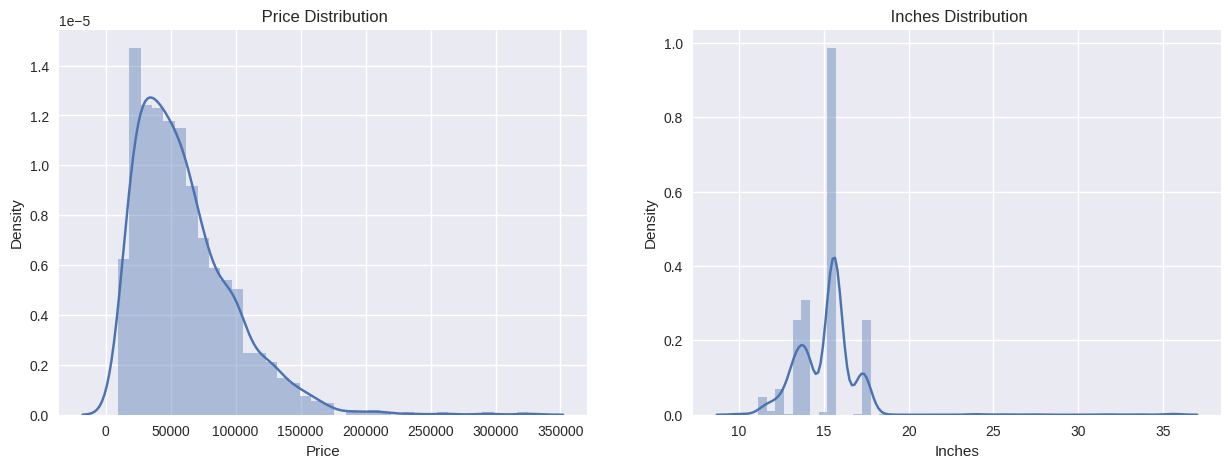

In [157]:
# Checking the distrbution
plt.figure(figsize = (15,5))
sns.set_palette("deep")
plt.subplot(121)
sns.distplot(df["Price"])
plt.title(" Price Distribution")

plt.subplot(122)
sns.distplot(df["Inches"])
plt.title(" Inches Distribution")

plt.show()

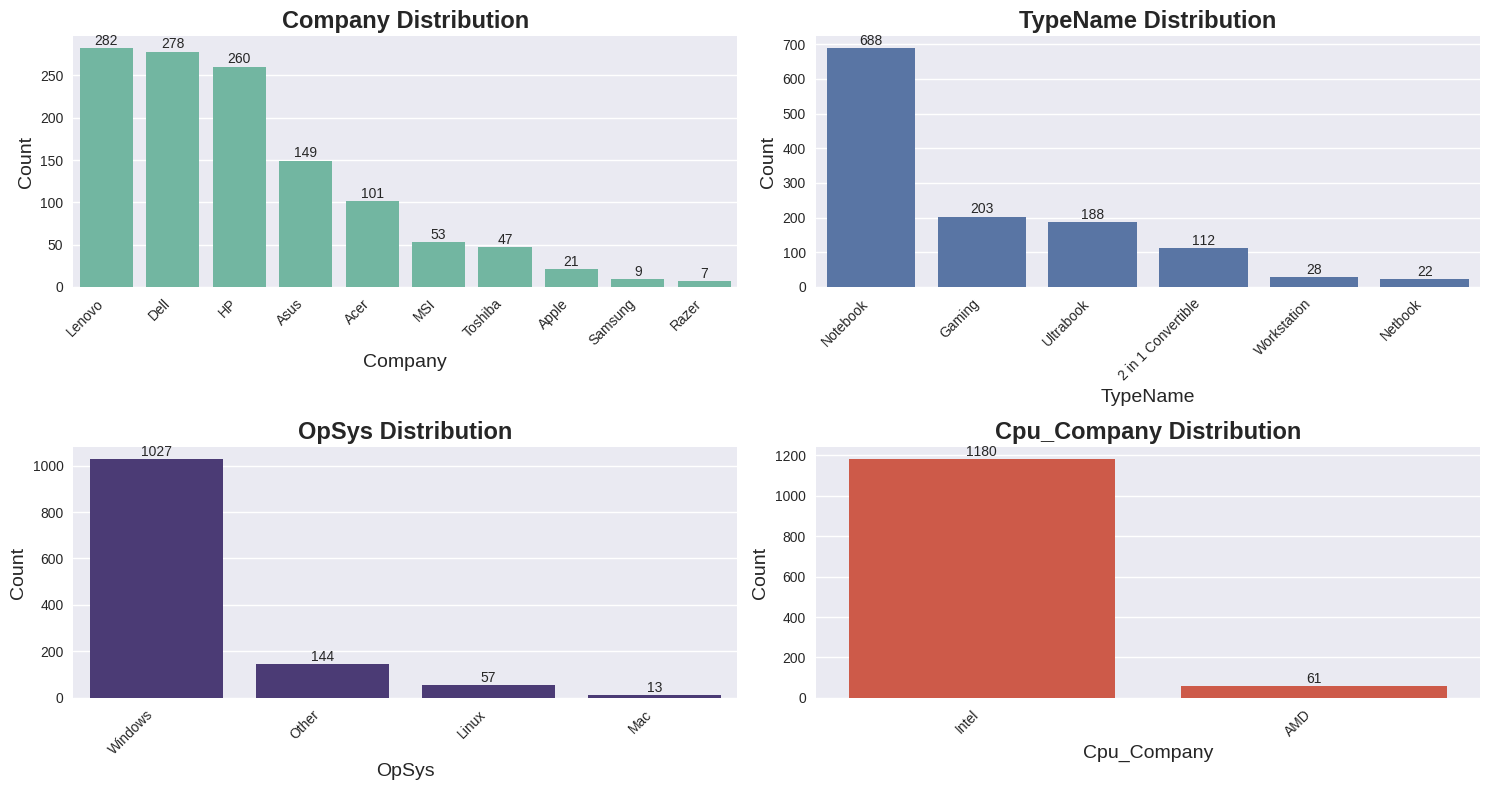

In [158]:
# Checking the Count of features in data set
plt.style.use('seaborn')
sns.set_palette("Set2")
plt.figure(figsize = (15,8))

plt.subplot(221)
sns.barplot(x=df['Company'].value_counts().head(10).index,
            y=df['Company'].value_counts().head(10).values)

plt.title('Company Distribution', fontsize=17, fontweight='bold')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(df['Company'].value_counts().head(10).values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# For TypeName
sns.set_palette("deep")
plt.subplot(222)
sns.barplot(x=df['TypeName'].value_counts().head(10).index,
            y=df['TypeName'].value_counts().head(10).values)

plt.title('TypeName Distribution', fontsize=17, fontweight='bold')
plt.xlabel('TypeName', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(df['TypeName'].value_counts().head(10).values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# For Operating System
sns.set_palette("viridis")
plt.subplot(223)
sns.barplot(x=df['OpSys'].value_counts().head(10).index,
            y=df['OpSys'].value_counts().head(10).values)

plt.title('OpSys Distribution', fontsize=17, fontweight='bold')
plt.xlabel('OpSys', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(df['OpSys'].value_counts().head(10).values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# For Cpu Company

sns.set_palette("RdYlBu")
plt.subplot(224)
sns.barplot(x=df['Cpu_Company'].value_counts().head(10).index,
            y=df['Cpu_Company'].value_counts().head(10).values)

plt.title('Cpu_Company Distribution', fontsize=17, fontweight='bold')
plt.xlabel('Cpu_Company', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(df['Cpu_Company'].value_counts().head(10).values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [159]:
df.sample()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS_Panel,Ppi,Cpu_Company,Cpu_Core,Cpu_GHz,SSD,HDD,Flash_Storage,Hybrid,Gpu_brand
658,Lenovo,Gaming,15.6,8,Windows,3.31,63722.88,0,1,141.21,Intel,i7,2.6,128,1000,0,0,Nvidia


In [160]:
df['Company'].value_counts()

Company
Lenovo       282
Dell         278
HP           260
Asus         149
Acer         101
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [161]:
Top_15 = df.groupby(by = "Company")["Price"].mean().sort_values(ascending = False)

In [162]:
grp = df.groupby(by = "Company")["TypeName"]

In [163]:
grp.get_group("MSI")

58      Gaming
73      Gaming
108     Gaming
121     Gaming
153     Gaming
165     Gaming
177     Gaming
258     Gaming
312     Gaming
330     Gaming
352     Gaming
393     Gaming
404     Gaming
448     Gaming
578     Gaming
585     Gaming
603     Gaming
605     Gaming
618     Gaming
653     Gaming
664     Gaming
675     Gaming
680     Gaming
724     Gaming
738     Gaming
785     Gaming
786     Gaming
811     Gaming
823     Gaming
894     Gaming
917     Gaming
919     Gaming
937     Gaming
1032    Gaming
1047    Gaming
1059    Gaming
1064    Gaming
1077    Gaming
1097    Gaming
1106    Gaming
1138    Gaming
1141    Gaming
1156    Gaming
1161    Gaming
1169    Gaming
1178    Gaming
1199    Gaming
1212    Gaming
1221    Gaming
1229    Gaming
1233    Gaming
1238    Gaming
1259    Gaming
Name: TypeName, dtype: object

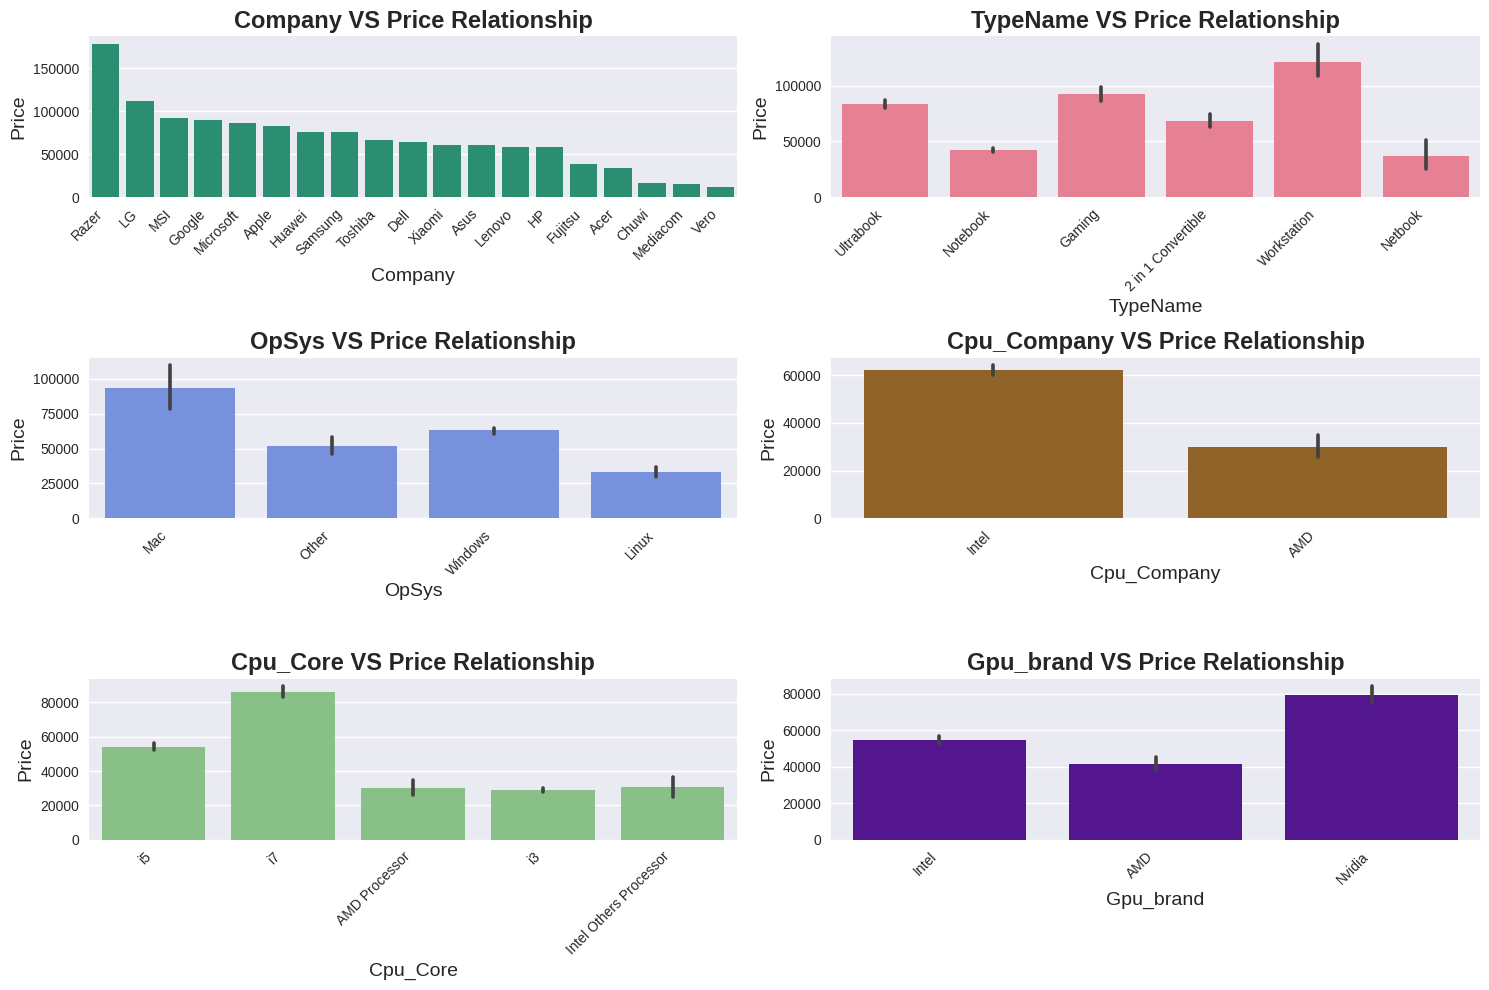

In [164]:
plt.style.use('seaborn')


# For Price and Company relationship
plt.figure(figsize = (15,10))
sns.set_palette("Dark2")
plt.subplot(321)
sns.barplot(x=Top_15.index,
            y=Top_15.values)

plt.title('Company VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(rotation=45, ha='right')


# For TypeName VS Price relationship
sns.set_palette("husl")
plt.subplot(322)

sns.set_palette("coolwarm")
sns.barplot(x=df['TypeName'],
            y=df['Price'])

plt.title('TypeName VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('TypeName', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(rotation=45, ha='right')

# For Operating System VS Price Relationship
plt.subplot(323)
sns.set_palette("BrBG")
sns.barplot(x=df['OpSys'],
            y=df['Price'])

plt.title('OpSys VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('OpSys', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(rotation=45, ha='right')

# For Cpu Company

plt.subplot(324)
sns.set_palette("Accent")
sns.barplot(x=df['Cpu_Company'],
            y=df['Price'])

plt.title('Cpu_Company VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('Cpu_Company', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(rotation=45, ha='right')

# For Cpu_Core VS Price

plt.subplot(325)
sns.set_palette("plasma")
sns.barplot(x=df['Cpu_Core'],
            y=df['Price'])

plt.title('Cpu_Core VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('Cpu_Core', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(rotation=45, ha='right')

# For GPU_Brand VS Price
plt.subplot(326)
sns.set_palette("cubehelix")
sns.barplot(x=df['Gpu_brand'],
            y=df['Price'])

plt.title('Gpu_brand VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('Gpu_brand', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [165]:
df.sample()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS_Panel,Ppi,Cpu_Company,Cpu_Core,Cpu_GHz,SSD,HDD,Flash_Storage,Hybrid,Gpu_brand
849,HP,Ultrabook,14.0,8,Windows,1.54,78215.04,0,0,157.35,Intel,i7,2.5,512,0,0,0,Intel


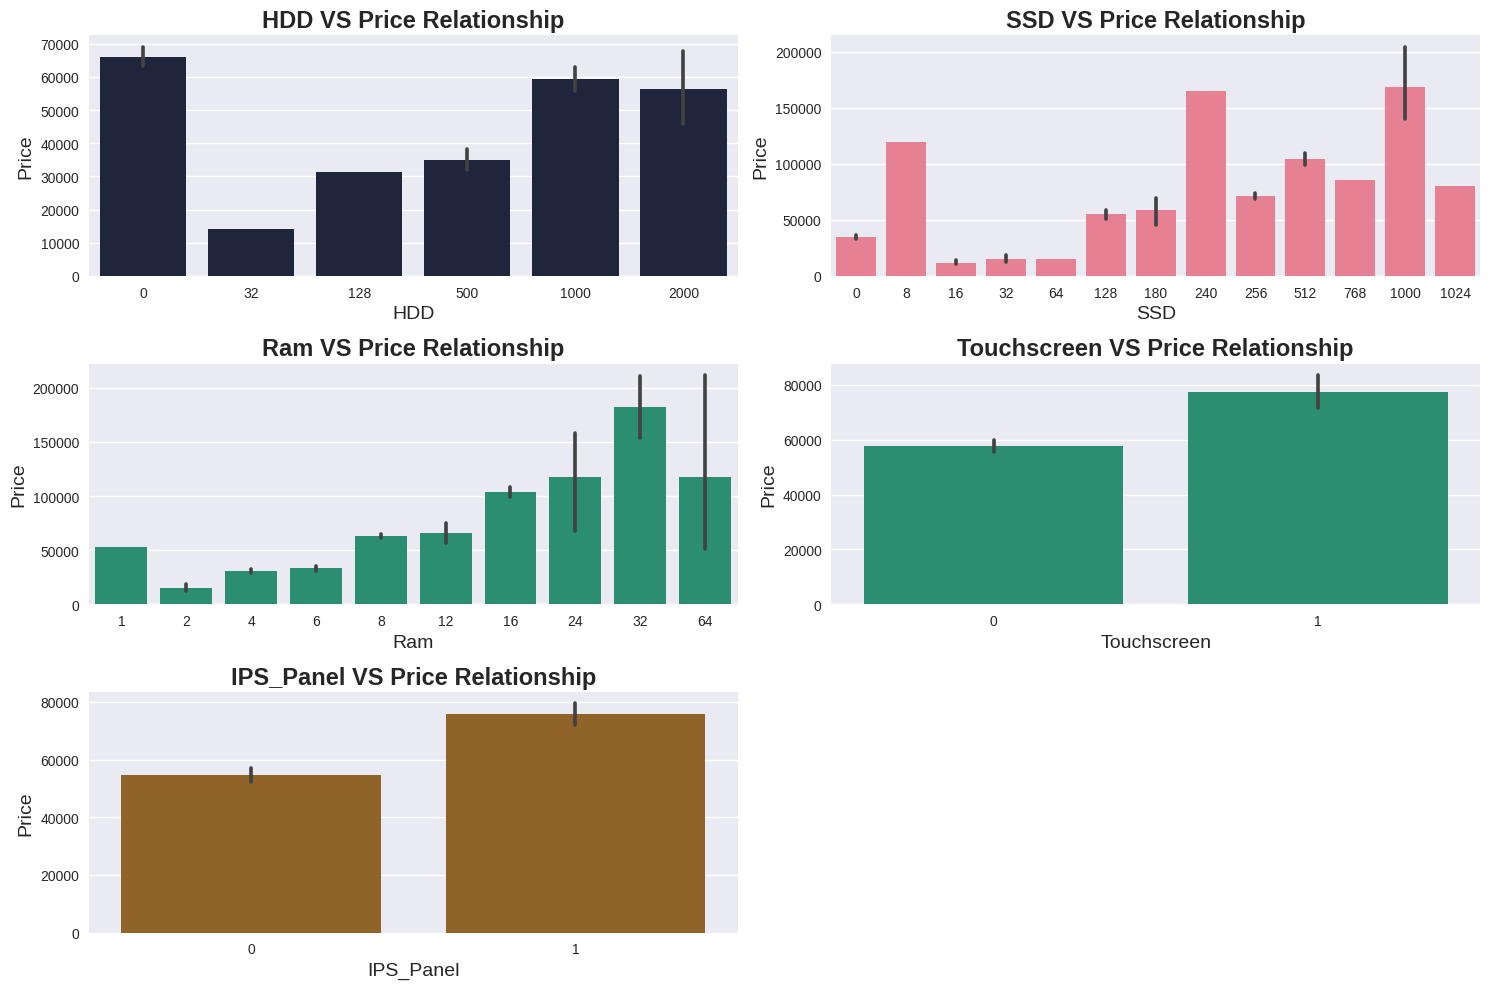

In [166]:

# For Ram VS Price relationship
plt.figure(figsize = (15,10))


# For HDD VS Price relationship
plt.subplot(321)
sns.set_palette("Accent")
sns.barplot(x=df['HDD'],
            y=df['Price'])

plt.title('HDD VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('HDD', fontsize=14)
plt.ylabel('Price', fontsize=14)

# For SSD VS Price relationship
sns.set_palette("husl")
plt.subplot(322)

sns.set_palette("coolwarm")
sns.barplot(x=df['SSD'],
            y=df['Price'])

plt.title('SSD VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('SSD', fontsize=14)
plt.ylabel('Price', fontsize=14)


# For Ram VS Price relationship
sns.set_palette("Dark2")
plt.subplot(323)

sns.barplot(x=df['Ram'],
            y=df['Price'])

plt.title('Ram VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('Ram', fontsize=14)
plt.ylabel('Price', fontsize=14)


# For TouchScreen VS Price Relationship
plt.subplot(324)
sns.set_palette("BrBG")
sns.barplot(x=df['Touchscreen'],
            y=df['Price'])

plt.title('Touchscreen VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('Touchscreen', fontsize=14)
plt.ylabel('Price', fontsize=14)



# For IPS_Panel VS Price Relationship

plt.subplot(325)
sns.set_palette("Accent")
sns.barplot(x=df['IPS_Panel'],
            y=df['Price'])

plt.title('IPS_Panel VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('IPS_Panel', fontsize=14)
plt.ylabel('Price', fontsize=14)


plt.tight_layout()
plt.show()

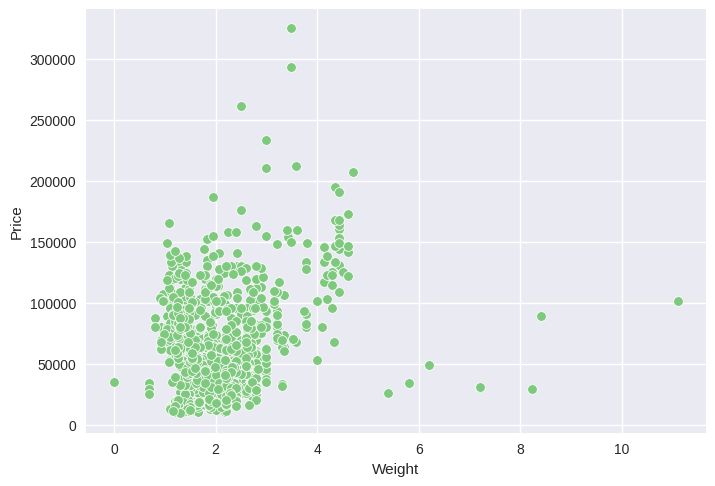

In [167]:
sns.scatterplot(df, x = "Weight",y = "Price")
plt.show()

**Data Pre-Processing**

In [168]:
df.select_dtypes(include = "object")

,Company,TypeName,OpSys,Cpu_Company,Cpu_Core,Gpu_brand
0,Apple,Ultrabook,Mac,Intel,i5,Intel
1,Apple,Ultrabook,Mac,Intel,i5,Intel
2,HP,Notebook,Other,Intel,i5,Intel
3,Apple,Ultrabook,Mac,Intel,i7,AMD
4,Apple,Ultrabook,Mac,Intel,i5,Intel
...,...,...,...,...,...,...
1269,Asus,Notebook,Windows,Intel,i7,Nvidia
1270,Lenovo,2 in 1 Convertible,Windows,Intel,i7,Intel
1271,Lenovo,2 in 1 Convertible,Windows,Intel,i7,Intel
1272,Lenovo,Notebook,Windows,Intel,Intel Others Processor,Intel


In [169]:
columns = ["Company","TypeName","OpSys","Cpu_Company","Cpu_Core","Gpu_brand"]

In [170]:
df_new = pd.get_dummies(df,columns =columns,drop_first = True,dtype = int)

In [171]:
df_new.head()

,Inches,Ram,Weight,Price,Touchscreen,IPS_Panel,Ppi,Cpu_GHz,SSD,HDD,...,OpSys_Mac,OpSys_Other,OpSys_Windows,Cpu_Company_Intel,Cpu_Core_Intel Others Processor,Cpu_Core_i3,Cpu_Core_i5,Cpu_Core_i7,Gpu_brand_Intel,Gpu_brand_Nvidia
0,13.3,8,1.37,71378.6832,0,1,226.98,2.3,128,0,...,1,0,0,1,0,0,1,0,1,0
1,13.3,8,1.34,47895.5232,0,0,127.68,1.8,0,0,...,1,0,0,1,0,0,1,0,1,0
2,15.6,8,1.86,30636.0000,0,0,141.21,2.5,256,0,...,0,1,0,1,0,0,1,0,1,0
3,15.4,16,1.83,135195.3360,0,1,220.53,2.7,512,0,...,1,0,0,1,0,0,0,1,0,0
4,13.3,8,1.37,96095.8080,0,1,226.98,3.1,256,0,...,1,0,0,1,0,0,1,0,1,0


In [172]:
X = df_new.drop(columns = "Price")
Y = df_new["Price"]

In [173]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state= 42)

# **Model Training and Evaluation**

**Linear Regression Model**

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [175]:
Lin_reg = LinearRegression()

In [176]:
Lin_reg.fit(x_train,y_train)

LinearRegression()

In [177]:
y_pred = Lin_reg.predict(x_test)

In [178]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [179]:
print(f"MSE:   {mse}")
print(f"RMSE:   {rmse}")
print(f"r2_score:   {r2}")

MSE:   325744048.25031
RMSE:   18048.380765329337
r2_score:   0.7395140149850841


# **Gradient Boosting Regressor Model**

In [180]:
from sklearn.ensemble import GradientBoostingRegressor

GradientBoost_model = GradientBoostingRegressor()

GradientBoost_model.fit(x_train, y_train)


y_pred = GradientBoost_model.predict(x_test)


In [181]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [182]:
print(f"MSE:   {mse}")
print(f"RMSE:   {rmse}")
print(f"r2_score:   {r2}")

MSE:   233472737.2079086
RMSE:   15279.814698088083
r2_score:   0.8133001162956082


# **Random Forest Regressor**

In [183]:
from sklearn.ensemble import RandomForestRegressor

In [184]:
Random_F_model = RandomForestRegressor()

In [185]:
Random_F_model.fit(x_train,y_train)

RandomForestRegressor()

In [186]:
y_pred = Random_F_model.predict(x_test)

In [187]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [188]:
print(f"MSE:   {mse}")
print(f"RMSE:   {rmse}")
print(f"r2_score:   {r2}")

MSE:   223459787.19469008
RMSE:   14948.571409826762
r2_score:   0.8213071179925174


# **Fine Tunning with Random Forest**

**GridSearchCV**

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [190]:
Random_F_model = RandomForestRegressor(random_state=42)

params = {
    "n_estimators": [80, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [191]:
grid_RF = GridSearchCV(
    estimator=Random_F_model,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [192]:
grid_RF.fit(x_train, y_train)


print("Best parameters:", grid_RF.best_params_)
print("Best score:", -grid_RF.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 314164313.2665125


In [193]:
best_rf_model = grid_RF.best_estimator_
best_rf_model

RandomForestRegressor(n_estimators=300, random_state=42)

In [194]:
y_pred = best_rf_model.predict(x_test)

In [195]:
r2 = r2_score(y_test, y_pred)

In [196]:
r2 = r2_score(y_test, y_pred)
print(f"r2 score: {r2:.4f}")

y_train_pred = best_rf_model.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training R-squared score: {r2_train:.4f}")

r2 score: 0.8301
Training R-squared score: 0.9714


In [203]:
x_train.columns

Index(['Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS_Panel', 'Ppi', 'Cpu_GHz',
       'SSD', 'HDD', 'Flash_Storage', 'Hybrid', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows',
       'Cpu_Company_Intel', 'Cpu_Core_Intel Others Processor', 'Cpu_Core_i3',
       'Cpu_Core_i5', 'Cpu_Core_i7', 'Gpu_brand_Intel', 'Gpu_brand_Nvidia'],
      dtype='object')

# **Insights and Answering the Business Questions**

**Question: Which features have the most significant impact on laptop prices?**

**Answer**:

1. **Processor Brand and Type:** Laptops equipped with Intel Core i7 processors are generally more expensive.

2. **Screen Resolution and Panel Type:** Laptops with higher resolutions (such as 4K or Retina Display) and IPS panels typically come with a higher price tag.

3. **RAM and Storage**: Higher RAM capacities (e.g., 32GB) and larger SSD storage significantly increase the price of laptops.

4. **Brand:** Premium brands like Apple, Razer, LG, MSI, Microsoft, and Google usually command higher prices.

5. **Additional Features:** Features like touchscreens, IPS displays,  dedicated Nvidia GPUs, and lightweight designs contribute to higher costs.

**Question: Can the model accurately predict the prices of laptops from lesser-known brands?**

**Answer:**I applied prediction on five lesser-known companies based on the count of orders. The average prediction accuracy is nearly 70%, which is good considering the limited data available.

In [229]:
Lesser_know_company = ["Company_Vero","Company_Mediacom","Company_Razer","Company_Fujitsu", "Company_Chuwi" ]

def predict(company_name):
  company = df_new[df_new[company_name] == 1]
  x_tests = company.drop(columns = "Price")
  y_tests = company["Price"]
  y_pred = best_rf_model.predict(x_tests)
  r2 = r2_score(y_tests, y_pred)
  return f"{company_name}: r2_score is {r2}"

In [231]:
for col in Lesser_know_company:
  a = predict(col)
  print(a)

Company_Vero: r2_score is 0.3842274343985136
Company_Mediacom: r2_score is 0.4579651970744292
Company_Razer: r2_score is 0.939979061069591
Company_Fujitsu: r2_score is 0.963143837628561
Company_Chuwi: r2_score is 0.7472274311548681


In [232]:
r2s = [0.3842, 0.4579, 0.9399, 0.9631, 0.7472 ]
Average_prediction = np.mean(r2s)
Average_prediction

0.69846

**Question: Does the brand of the laptop significantly influence its price?**

**Answer:**Yes, the brand has a significant influence on laptop prices. Premium brands like LG, Apple,Google and Microsoft have a substantial brand premium.

The model captures this brand effect, adjusting predictions higher for well-known brands even with similar technical specifications to lesser-known brands.

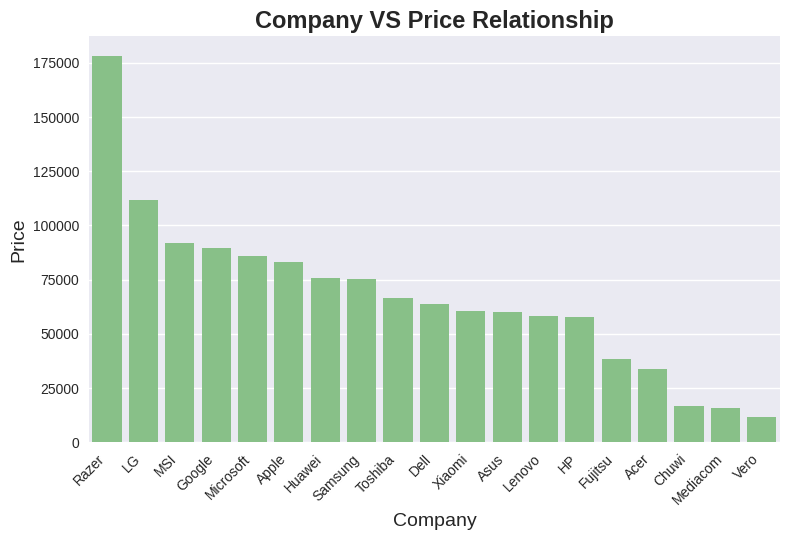

In [233]:
sns.barplot(x=Top_15.index,
            y=Top_15.values)

plt.title('Company VS Price Relationship', fontsize=17, fontweight='bold')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Question: How well does the model perform on laptops with high-end specifications compared to budget laptops?**

**Ansswer:** High-end Laptops: The model performs well on high-end laptops, accurately predicting prices by effectively utilizing features like processor type, RAM, and screen resolution.

Budget Laptops: The model also performs well in the budget segment, but with slightly higher prediction variance due to the competitive pricing strategies of different brands.

In [263]:
high_end_spec = df_new[df_new["Price"] > 80000]
low_end_spec = df_new[df_new["Price"] < 80000]

In [264]:
def predict(spec):
  x_tests = spec.drop(columns = "Price")
  y_tests = spec["Price"]
  y_pred = best_rf_model.predict(x_tests)
  r2 = r2_score(y_tests, y_pred)
  return f"r2_score is {r2}"

In [265]:
predict(high_end_spec)

'r2_score is 0.7782075880686133'

In [266]:
predict(low_end_spec)

'r2_score is 0.8873146886645106'

**Question:What are the limitations and challenges in predicting laptop prices accurately?**

**Answer:** I have face the following Challenges:

**Extracting Relevant Features:** Identifying and selecting the most relevant features from the dataset can be challenging and crucial for accurate predictions.

**Variation in Nominal Columns:** High variability in nominal (categorical) columns can adversely affect the model's prediction accuracy.

**Data Quality:** Incomplete, inconsistent, or erroneous data can lead to inaccurate predictions.

**Market Dynamics**: Rapid changes in technology and pricing strategies can quickly render models outdated.

**Brand Perception:** Fluctuations in brand perception over time can significantly impact pricing predictions.


**Question: How does the model perform when predicting the prices of newly released laptops not present in the training dataset?**

**Answer**
1. The model may show reduced accuracy for newly released laptops due to the lack of historical data on these models.

2. Real-time adjustments and continuous training with new data can help mitigate this issue.

3. Incorporating a mechanism to quickly update the model with new data can improve its performance on new releases.

**Recommendations for SmartTech Co.**

**1. Enhance Data Collection:** Improve data quality and ensure up-to-date information for better model accuracy.

**2. Regular Model Updates:** Continuously retrain the model with new data to capture market trends and emerging technologies.

**3. Dynamic Pricing Strategies:** Implement flexible pricing strategies that can adapt to rapid market changes.

**4. Focus on Key Features:** Highlight and invest in key features that significantly impact prices, like high-end processors, superior display technology, and premium build quality.

**5. Brand Building:** Invest in marketing to strengthen brand perception, which can allow for higher pricing strategies.

# **-------------------------------------------------------------Thank You--------------------------------------------------------------------------------------------------------------------------**